In [1]:
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from DQN_Agent import DQNAgent
from models import DQN

In [2]:
env = gym.make('CartPole-v1', render_mode='rgb_array')
print(env.observation_space.shape)
print(env.action_space)

(4,)
Discrete(2)


In [3]:
params = {'eps_min': 1e-2, 
          'eps_max': 0.9, 
          'lr': 1e-4,
          'eps_decay': 1000, 
          'buffer_capacity': 10000
          }

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
optim = torch.optim.Adam
net = DQN(n_observations=4, n_actions=2)
agent = DQNAgent(env=env, net=net, optimizer=optim, device=device, **params)

In [5]:
durations = agent.train(episodes=500, batch_size=128, print_every=10)

  4%|▍         | 20/500 [00:00<00:08, 54.46it/s]

Episode Duration: 33
Episode Duration: 10


  8%|▊         | 40/500 [00:00<00:06, 76.30it/s]

Episode Duration: 19
Episode Duration: 12
Episode Duration: 11


 13%|█▎        | 63/500 [00:00<00:04, 90.99it/s]

Episode Duration: 9
Episode Duration: 46


 16%|█▌        | 81/500 [00:01<00:08, 51.52it/s]

Episode Duration: 97


 19%|█▊        | 93/500 [00:01<00:12, 32.36it/s]

Episode Duration: 54


 20%|██        | 102/500 [00:02<00:17, 23.34it/s]

Episode Duration: 55


 22%|██▏       | 111/500 [00:03<00:28, 13.44it/s]

Episode Duration: 499


 24%|██▍       | 120/500 [00:05<01:24,  4.50it/s]

Episode Duration: 356


 26%|██▌       | 130/500 [00:08<01:23,  4.45it/s]

Episode Duration: 190


 28%|██▊       | 140/500 [00:11<01:44,  3.45it/s]

Episode Duration: 375


 30%|███       | 150/500 [00:14<01:56,  3.02it/s]

Episode Duration: 499


 32%|███▏      | 160/500 [00:17<01:54,  2.98it/s]

Episode Duration: 499


 34%|███▍      | 170/500 [00:21<01:51,  2.96it/s]

Episode Duration: 499


 36%|███▌      | 180/500 [00:24<01:48,  2.96it/s]

Episode Duration: 499


 38%|███▊      | 190/500 [00:28<01:45,  2.93it/s]

Episode Duration: 499


 40%|████      | 200/500 [00:31<01:42,  2.92it/s]

Episode Duration: 499


 42%|████▏     | 210/500 [00:35<01:41,  2.87it/s]

Episode Duration: 499


 44%|████▍     | 220/500 [00:38<01:35,  2.93it/s]

Episode Duration: 499


 46%|████▌     | 228/500 [00:41<01:23,  3.25it/s]

Episode Duration: 11


 48%|████▊     | 240/500 [00:42<00:30,  8.46it/s]

Episode Duration: 424


 50%|█████     | 250/500 [00:45<01:21,  3.09it/s]

Episode Duration: 499


 52%|█████▏    | 260/500 [00:48<01:21,  2.94it/s]

Episode Duration: 499


 54%|█████▍    | 270/500 [00:52<01:18,  2.94it/s]

Episode Duration: 499


 56%|█████▌    | 280/500 [00:55<01:15,  2.93it/s]

Episode Duration: 499


 58%|█████▊    | 290/500 [00:59<01:13,  2.86it/s]

Episode Duration: 499


 60%|██████    | 300/500 [01:02<01:08,  2.92it/s]

Episode Duration: 499


 62%|██████▏   | 310/500 [01:06<01:05,  2.92it/s]

Episode Duration: 499


 63%|██████▎   | 314/500 [01:07<00:58,  3.16it/s]

Episode Duration: 11


 67%|██████▋   | 337/500 [01:08<00:06, 23.52it/s]

Episode Duration: 11
Episode Duration: 14


 70%|███████   | 350/500 [01:11<00:30,  4.97it/s]

Episode Duration: 499


 72%|███████▏  | 360/500 [01:15<00:45,  3.05it/s]

Episode Duration: 499


 74%|███████▍  | 370/500 [01:18<00:44,  2.92it/s]

Episode Duration: 499


 76%|███████▌  | 380/500 [01:21<00:36,  3.28it/s]

Episode Duration: 439


 78%|███████▊  | 390/500 [01:24<00:35,  3.12it/s]

Episode Duration: 499


 80%|████████  | 400/500 [01:28<00:34,  2.92it/s]

Episode Duration: 499


 82%|████████▏ | 410/500 [01:31<00:31,  2.89it/s]

Episode Duration: 499


 84%|████████▍ | 420/500 [01:35<00:27,  2.92it/s]

Episode Duration: 499


 86%|████████▌ | 430/500 [01:38<00:24,  2.91it/s]

Episode Duration: 499


 88%|████████▊ | 440/500 [01:42<00:20,  2.90it/s]

Episode Duration: 499


 90%|█████████ | 450/500 [01:45<00:17,  2.91it/s]

Episode Duration: 499


 92%|█████████▏| 460/500 [01:49<00:13,  2.86it/s]

Episode Duration: 499


 96%|█████████▌| 479/500 [01:51<00:01, 16.30it/s]

Episode Duration: 9
Episode Duration: 8


100%|██████████| 500/500 [01:51<00:00,  4.47it/s]


Episode Duration: 15
Episode Duration: 14


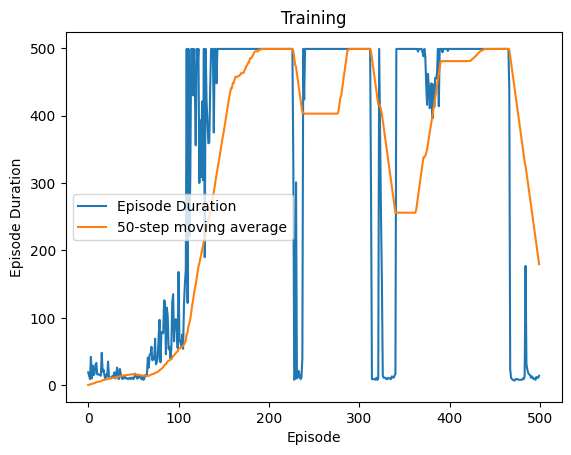

In [6]:
x = list(range(0, 500))
plt.plot(x, durations, label='Episode Duration')
plt.title('Training')
plt.xlabel('Episode')
plt.ylabel('Episode Duration')
avg_length = 50
means = np.convolve(durations, np.ones(avg_length)/avg_length, mode='full')[:500]
plt.plot(x, means, label=f'{avg_length}-step moving average')
plt.legend()

plt.show()